<a href="https://colab.research.google.com/github/gianlucaHemireni/colab_notebooks/blob/main/test_kernel_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
ls()
install.packages("tidyverse")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpjBzgfZ/downloaded_packages’



In [3]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
%%R
cal = read_delim("/content/sample_data/california_housing_train.csv")

Rows: 17000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
%%R
cal |> head()

# A tibble: 6 × 9
  longitude latitude housing_median_age total_rooms total_bedrooms population
      <dbl>    <dbl>              <dbl>       <dbl>          <dbl>      <dbl>
1     -114.     34.2                 15        5612           1283       1015
2     -114.     34.4                 19        7650           1901       1129
3     -115.     33.7                 17         720            174        333
4     -115.     33.6                 14        1501            337        515
5     -115.     33.6                 20        1454            326        624
6     -115.     33.6                 29        1387            236        671
# ℹ 3 more variables: households <dbl>, median_income <dbl>,
#   median_house_value <dbl>


In [14]:
%%R
summary(cal$median_income)
cal = cal |> mutate(income_class = case_when(
    median_income < quantile(median_income, 0.25) ~ "Low",
    median_income >= quantile(median_income, 0.25) & median_income < quantile(median_income, 0.5) ~ "Mid-low",
    median_income >= quantile(median_income, 0.5) & median_income < quantile(median_income, 0.75) ~ "Mid-high",
    median_income >= quantile(median_income, 0.75) ~ "High"
), income_class = factor(income_class, levels = c("Low", "Mid-low", "Mid-high", "High")))


summary(cal$income_class)


     Low  Mid-low Mid-high     High 
    4250     4249     4251     4250 


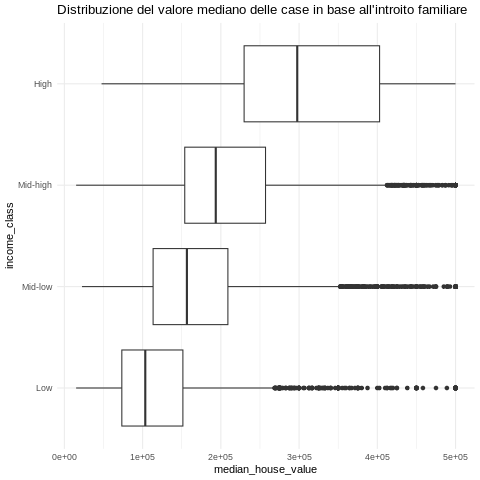

In [17]:
%%R
ggplot(data = cal, aes(x = median_house_value, y = income_class)) +
  geom_boxplot() +
  ggtitle("Distribuzione del valore mediano delle case in base all'introito familiare") +
  theme_minimal()

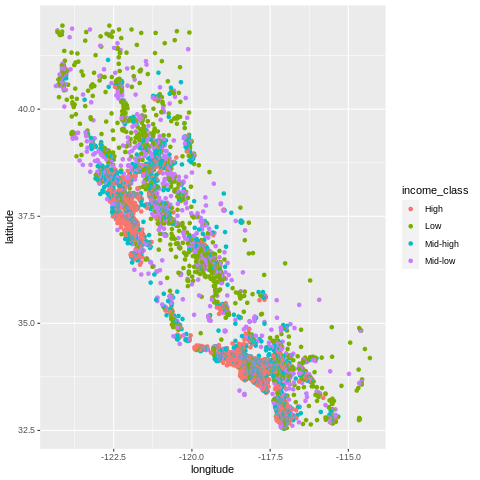

In [10]:
%%R
ggplot(data=cal, aes(x=longitude, y=latitude, col=income_class)) + geom_point()